In [28]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [29]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [30]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

11 11
wvfrm = 
l =  0  SNR =  15.653331519859616  m1 =  11  m2 =  11
13 13
wvfrm = 
l =  1  SNR =  9.900438069322282  m1 =  13  m2 =  13
15 19
wvfrm = 
l =  2  SNR =  16.40773991637791  m1 =  15  m2 =  19
21 12
wvfrm = 
l =  3  SNR =  8.412099215016761  m1 =  21  m2 =  12
14 24
wvfrm = 
l =  4  SNR =  39.55090249601542  m1 =  14  m2 =  24
13 20
wvfrm = 
l =  5  SNR =  20.724714563364238  m1 =  13  m2 =  20
27 23
wvfrm = 
l =  6  SNR =  41.75323299756288  m1 =  27  m2 =  23
22 12
wvfrm = 
l =  7  SNR =  8.813733803989319  m1 =  22  m2 =  12
12 20
wvfrm = 
l =  8  SNR =  6.822037638004561  m1 =  12  m2 =  20
28 18
wvfrm = 
l =  9  SNR =  9.389573447416064  m1 =  28  m2 =  18
18 11
wvfrm = 
l =  10  SNR =  30.062248682277644  m1 =  18  m2 =  11
20 10
wvfrm = 
l =  11  SNR =  8.846776213241009  m1 =  20  m2 =  10
14 12
wvfrm = 
l =  12  SNR =  7.524828280715788  m1 =  14  m2 =  12
22 19
wvfrm = 
l =  13  SNR =  13.045255000010746  m1 =  22  m2 =  19
25 11
wvfrm = 
l =  14  SNR =  31.143931

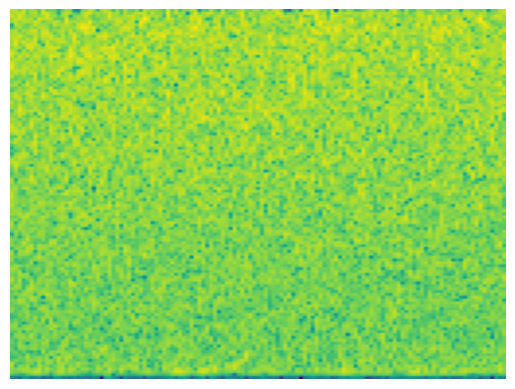

In [31]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)

    plt.savefig(
        f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
        bbox_inches="tight",
        pad_inches=0,
    )
    l += 1

In [32]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

13 13
wvfrm = 
l =  100  SNR =  17.6262863541878  m1 =  13  m2 =  13
17 30
wvfrm = 
l =  101  SNR =  10.318435136827228  m1 =  17  m2 =  30
11 26
wvfrm = 
l =  102  SNR =  8.815370931905651  m1 =  11  m2 =  26
29 29
wvfrm = 
l =  103  SNR =  29.921167752866733  m1 =  29  m2 =  29
18 29
wvfrm = 
l =  103  SNR =  22.475240148938138  m1 =  18  m2 =  29
11 30
wvfrm = 
l =  103  SNR =  10.195763692404542  m1 =  11  m2 =  30
28 27
wvfrm = 
l =  104  SNR =  34.28385193894855  m1 =  28  m2 =  27
23 21
wvfrm = 
l =  104  SNR =  18.383724473073848  m1 =  23  m2 =  21
26 17
wvfrm = 
l =  105  SNR =  37.51652789609611  m1 =  26  m2 =  17
16 30
wvfrm = 
l =  105  SNR =  9.468677400724365  m1 =  16  m2 =  30
20 10
wvfrm = 
l =  106  SNR =  25.42161779974587  m1 =  20  m2 =  10
13 19
wvfrm = 
l =  106  SNR =  9.785840648902239  m1 =  13  m2 =  19
18 26
wvfrm = 
l =  107  SNR =  20.850100557535367  m1 =  18  m2 =  26
13 22
wvfrm = 
l =  107  SNR =  15.926773644933991  m1 =  13  m2 =  22
10 10
wvfrm = 

10 30
wvfrm = 
l =  200  SNR =  7.490974563197808  m1 =  10  m2 =  30
15 10
wvfrm = 
l =  201  SNR =  8.06297549108961  m1 =  15  m2 =  10
27 21
wvfrm = 
l =  202  SNR =  14.00760534438218  m1 =  27  m2 =  21
24 27
wvfrm = 
l =  203  SNR =  17.591086574091243  m1 =  24  m2 =  27
15 30
wvfrm = 
l =  204  SNR =  13.834608240143657  m1 =  15  m2 =  30
22 16
wvfrm = 
l =  205  SNR =  7.883258987940282  m1 =  22  m2 =  16
12 13
wvfrm = 
l =  206  SNR =  7.133606448801799  m1 =  12  m2 =  13
30 11
wvfrm = 
l =  207  SNR =  7.610290599902611  m1 =  30  m2 =  11
26 25
wvfrm = 
l =  208  SNR =  14.538466452474012  m1 =  26  m2 =  25
20 19
wvfrm = 
l =  209  SNR =  10.871328888920699  m1 =  20  m2 =  19
15 17
wvfrm = 
l =  210  SNR =  8.200160920714392  m1 =  15  m2 =  17
20 25
wvfrm = 
l =  211  SNR =  9.373785817947317  m1 =  20  m2 =  25
24 25
wvfrm = 
l =  212  SNR =  11.473593941897803  m1 =  24  m2 =  25
25 16
wvfrm = 
l =  213  SNR =  12.416307213337664  m1 =  25  m2 =  16
23 27
wvfrm = 


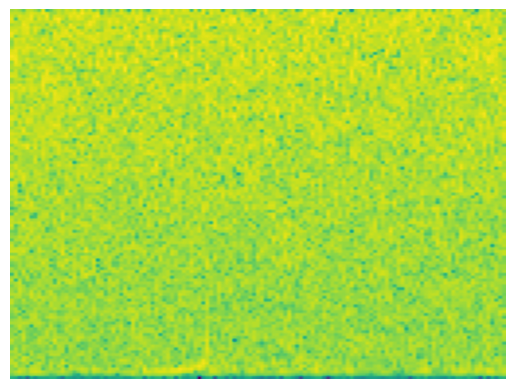

In [ ]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 12
wvfrm = 
l =  300  SNR =  10.478589687217585  m1 =  20  m2 =  12
16 18
wvfrm = 
l =  301  SNR =  9.496519042272169  m1 =  16  m2 =  18
29 12
wvfrm = 
l =  302  SNR =  10.290010039066953  m1 =  29  m2 =  12
11 20
wvfrm = 
l =  303  SNR =  6.459812429009202  m1 =  11  m2 =  20
29 11
wvfrm = 
l =  304  SNR =  7.09743217584504  m1 =  29  m2 =  11
23 25
wvfrm = 
l =  305  SNR =  10.527514236714973  m1 =  23  m2 =  25
13 15
wvfrm = 
l =  306  SNR =  8.45709000771632  m1 =  13  m2 =  15
11 26
wvfrm = 
l =  307  SNR =  8.505011505041837  m1 =  11  m2 =  26
13 28
wvfrm = 
l =  308  SNR =  8.511210852728361  m1 =  13  m2 =  28
21 19
wvfrm = 
l =  309  SNR =  12.578324452263297  m1 =  21  m2 =  19
22 28
wvfrm = 
l =  310  SNR =  17.271888141763437  m1 =  22  m2 =  28
18 26
wvfrm = 
l =  311  SNR =  13.870205916286041  m1 =  18  m2 =  26
24 18
wvfrm = 
l =  312  SNR =  9.495491583875111  m1 =  24  m2 =  18
29 28
wvfrm = 
l =  313  SNR =  15.84466667985876  m1 =  29  m2 =  28
27 21
wvfrm = 
l

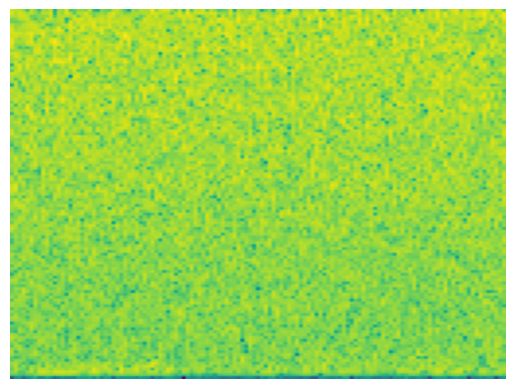

In [ ]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

17 17
wvfrm = 
l =  400  SNR =  13.670191970599202  m1 =  17  m2 =  17
17 18
wvfrm = 
l =  401  SNR =  9.402552385710184  m1 =  17  m2 =  18
15 27
wvfrm = 
l =  402  SNR =  12.056716145335068  m1 =  15  m2 =  27
18 11
wvfrm = 
l =  403  SNR =  12.221732593205969  m1 =  18  m2 =  11
29 13
wvfrm = 
l =  404  SNR =  10.644851167314535  m1 =  29  m2 =  13
11 22
wvfrm = 
l =  405  SNR =  6.15612096695812  m1 =  11  m2 =  22
28 20
wvfrm = 
l =  406  SNR =  11.853228513643122  m1 =  28  m2 =  20
13 18
wvfrm = 
l =  407  SNR =  12.386047283334838  m1 =  13  m2 =  18
15 22
wvfrm = 
l =  408  SNR =  12.888782847911074  m1 =  15  m2 =  22
10 25
wvfrm = 
l =  409  SNR =  12.540393357267325  m1 =  10  m2 =  25
22 22
wvfrm = 
l =  410  SNR =  15.486914295837776  m1 =  22  m2 =  22
30 17
wvfrm = 
l =  411  SNR =  10.87155212882961  m1 =  30  m2 =  17
26 25
wvfrm = 
l =  412  SNR =  11.946566165523  m1 =  26  m2 =  25
24 13
wvfrm = 
l =  413  SNR =  7.84931672329632  m1 =  24  m2 =  13
24 30
wvfrm = 


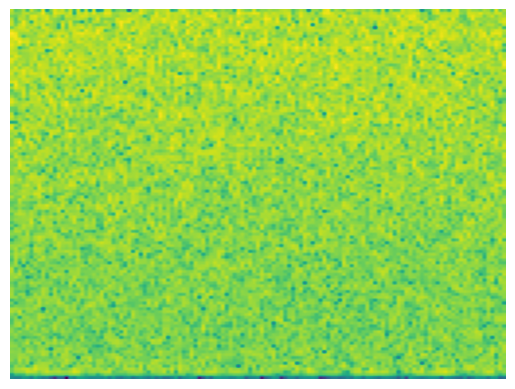

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 13
wvfrm = 
l =  500  SNR =  5.795568191275499  m1 =  12  m2 =  13
13 16
wvfrm = 
l =  501  SNR =  9.898657871562095  m1 =  13  m2 =  16
16 20
wvfrm = 
l =  502  SNR =  9.67844489946318  m1 =  16  m2 =  20
28 21
wvfrm = 
l =  503  SNR =  12.361749387086606  m1 =  28  m2 =  21
10 15
wvfrm = 
l =  504  SNR =  7.835892049940906  m1 =  10  m2 =  15
25 26
wvfrm = 
l =  505  SNR =  15.824948494557178  m1 =  25  m2 =  26
12 10
wvfrm = 
l =  506  SNR =  8.44682526987908  m1 =  12  m2 =  10
29 11
wvfrm = 
l =  507  SNR =  6.845120273580936  m1 =  29  m2 =  11
21 12
wvfrm = 
l =  508  SNR =  10.861839554156472  m1 =  21  m2 =  12
18 20
wvfrm = 
l =  509  SNR =  10.636895695471999  m1 =  18  m2 =  20
29 28
wvfrm = 
l =  510  SNR =  12.979885694775998  m1 =  29  m2 =  28
19 15
wvfrm = 
l =  511  SNR =  7.651826371008123  m1 =  19  m2 =  15
17 27
wvfrm = 
l =  512  SNR =  11.946676810260726  m1 =  17  m2 =  27
10 19
wvfrm = 
l =  513  SNR =  10.921040042697646  m1 =  10  m2 =  19
23 18
wvfrm = 


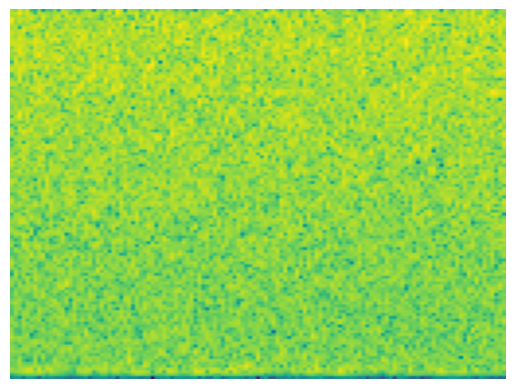

In [ ]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 19
wvfrm = 
l =  600  SNR =  13.211013497456902  m1 =  18  m2 =  19
30 16
wvfrm = 
l =  601  SNR =  12.03435472362278  m1 =  30  m2 =  16
17 19
wvfrm = 
l =  602  SNR =  10.47479835960467  m1 =  17  m2 =  19
21 14
wvfrm = 
l =  603  SNR =  8.99022010366749  m1 =  21  m2 =  14
27 19
wvfrm = 
l =  604  SNR =  12.347180416183132  m1 =  27  m2 =  19
30 10
wvfrm = 
l =  605  SNR =  9.693789001697903  m1 =  30  m2 =  10
10 10
wvfrm = 
l =  606  SNR =  6.337209837243963  m1 =  10  m2 =  10
14 17
wvfrm = 
l =  607  SNR =  7.95774662616628  m1 =  14  m2 =  17
18 27
wvfrm = 
l =  608  SNR =  9.469160654716914  m1 =  18  m2 =  27
23 12
wvfrm = 
l =  609  SNR =  8.409020598950713  m1 =  23  m2 =  12
15 15
wvfrm = 
l =  610  SNR =  8.692754536127802  m1 =  15  m2 =  15
20 10
wvfrm = 
l =  611  SNR =  10.216858039307791  m1 =  20  m2 =  10
19 22
wvfrm = 
l =  612  SNR =  12.515502471673068  m1 =  19  m2 =  22
29 23
wvfrm = 
l =  613  SNR =  12.026877184158256  m1 =  29  m2 =  23
21 26
wvfrm = 
l 

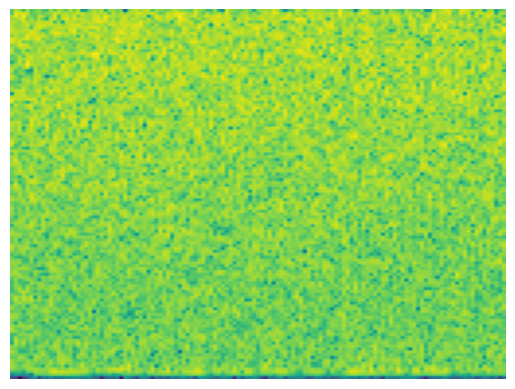

In [ ]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 18
wvfrm = 
l =  700  SNR =  12.551863080192982  m1 =  19  m2 =  18
16 24
wvfrm = 
l =  701  SNR =  11.162109730733256  m1 =  16  m2 =  24
28 22
wvfrm = 
l =  702  SNR =  15.248208920477408  m1 =  28  m2 =  22
11 21
wvfrm = 
l =  703  SNR =  7.6539541325072395  m1 =  11  m2 =  21
16 26
wvfrm = 
l =  704  SNR =  15.45231108596528  m1 =  16  m2 =  26
14 16
wvfrm = 
l =  705  SNR =  10.60833261470111  m1 =  14  m2 =  16
22 14
wvfrm = 
l =  706  SNR =  9.927796556185363  m1 =  22  m2 =  14
28 28
wvfrm = 
l =  707  SNR =  16.325009876938466  m1 =  28  m2 =  28
14 30
wvfrm = 
l =  708  SNR =  8.951249899130179  m1 =  14  m2 =  30
16 12
wvfrm = 
l =  709  SNR =  10.118991033521123  m1 =  16  m2 =  12
18 10
wvfrm = 
l =  710  SNR =  7.559897975928161  m1 =  18  m2 =  10
25 21
wvfrm = 
l =  711  SNR =  13.294181022922556  m1 =  25  m2 =  21
25 22
wvfrm = 
l =  712  SNR =  12.958271307335592  m1 =  25  m2 =  22
13 14
wvfrm = 
l =  713  SNR =  8.160820734015475  m1 =  13  m2 =  14
15 16
wvfrm 

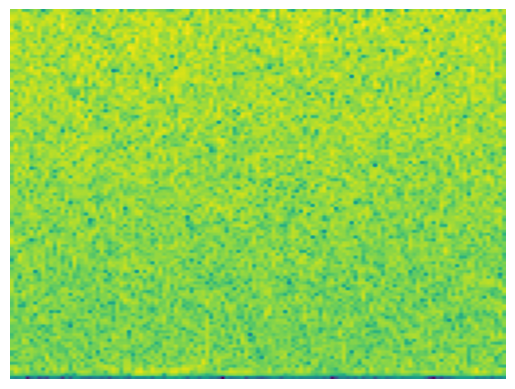

In [ ]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 23
wvfrm = 
l =  800  SNR =  12.74390112228715  m1 =  29  m2 =  23
19 15
wvfrm = 
l =  801  SNR =  10.413496303629497  m1 =  19  m2 =  15
19 17
wvfrm = 
l =  802  SNR =  8.154223969890532  m1 =  19  m2 =  17
29 27
wvfrm = 
l =  803  SNR =  15.379078955621894  m1 =  29  m2 =  27
15 21
wvfrm = 
l =  804  SNR =  11.475008717271796  m1 =  15  m2 =  21
13 30
wvfrm = 
l =  805  SNR =  12.240921347087257  m1 =  13  m2 =  30
29 22
wvfrm = 
l =  806  SNR =  12.301828847675315  m1 =  29  m2 =  22
17 23
wvfrm = 
l =  807  SNR =  11.327046059726966  m1 =  17  m2 =  23
20 17
wvfrm = 
l =  808  SNR =  9.854591596741106  m1 =  20  m2 =  17
13 20
wvfrm = 
l =  809  SNR =  11.21841895088318  m1 =  13  m2 =  20
28 28
wvfrm = 
l =  810  SNR =  16.400869465377074  m1 =  28  m2 =  28
20 30
wvfrm = 
l =  811  SNR =  10.707705544969226  m1 =  20  m2 =  30
13 16
wvfrm = 
l =  812  SNR =  8.475543811064629  m1 =  13  m2 =  16
24 21
wvfrm = 
l =  813  SNR =  8.410539241014618  m1 =  24  m2 =  21
10 14
wvfrm 

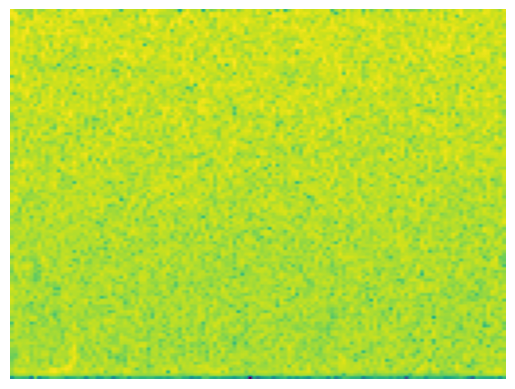

In [ ]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 20
wvfrm = 
l =  900  SNR =  9.810392856523947  m1 =  18  m2 =  20
26 11
wvfrm = 
l =  901  SNR =  11.048254723856086  m1 =  26  m2 =  11
10 19
wvfrm = 
l =  902  SNR =  8.315944176901422  m1 =  10  m2 =  19
21 26
wvfrm = 
l =  903  SNR =  12.559384349775701  m1 =  21  m2 =  26
22 28
wvfrm = 
l =  904  SNR =  11.596359554127957  m1 =  22  m2 =  28
26 21
wvfrm = 
l =  905  SNR =  9.841107686637393  m1 =  26  m2 =  21
25 20
wvfrm = 
l =  906  SNR =  12.79764242678823  m1 =  25  m2 =  20
24 21
wvfrm = 
l =  907  SNR =  14.393787227105282  m1 =  24  m2 =  21
14 16
wvfrm = 
l =  908  SNR =  7.009276159137803  m1 =  14  m2 =  16
12 22
wvfrm = 
l =  909  SNR =  9.775676503693452  m1 =  12  m2 =  22
26 29
wvfrm = 
l =  910  SNR =  11.962357824262048  m1 =  26  m2 =  29
12 17
wvfrm = 
l =  911  SNR =  9.002968988340074  m1 =  12  m2 =  17
22 14
wvfrm = 
l =  912  SNR =  9.619293585921216  m1 =  22  m2 =  14
29 25
wvfrm = 
l =  913  SNR =  16.820865519920172  m1 =  29  m2 =  25
20 17
wvfrm = 

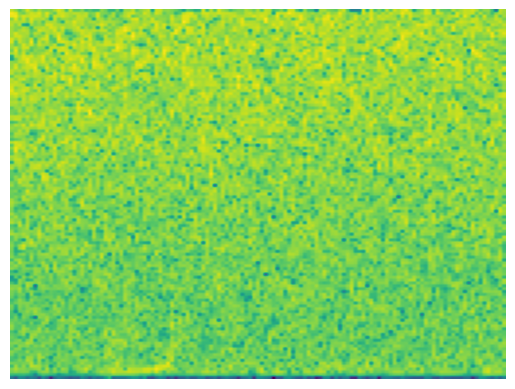

In [ ]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 29
wvfrm = 
l =  1000  SNR =  13.09143918339676  m1 =  29  m2 =  29
22 27
wvfrm = 
l =  1001  SNR =  15.57855297286318  m1 =  22  m2 =  27
18 16
wvfrm = 
l =  1002  SNR =  10.818082259737372  m1 =  18  m2 =  16
20 20
wvfrm = 
l =  1003  SNR =  12.256296888452649  m1 =  20  m2 =  20
14 12
wvfrm = 
l =  1004  SNR =  8.456630493500386  m1 =  14  m2 =  12
10 29
wvfrm = 
l =  1005  SNR =  10.9017496285284  m1 =  10  m2 =  29
13 14
wvfrm = 
l =  1006  SNR =  6.487564303167037  m1 =  13  m2 =  14
17 17
wvfrm = 
l =  1007  SNR =  10.885704065821804  m1 =  17  m2 =  17
11 21
wvfrm = 
l =  1008  SNR =  10.538312124357684  m1 =  11  m2 =  21
23 23
wvfrm = 
l =  1009  SNR =  10.01952021706191  m1 =  23  m2 =  23
19 17
wvfrm = 
l =  1010  SNR =  9.912575763335298  m1 =  19  m2 =  17
29 28
wvfrm = 
l =  1011  SNR =  11.628580417641363  m1 =  29  m2 =  28
10 15
wvfrm = 
l =  1012  SNR =  8.21599632532324  m1 =  10  m2 =  15
18 14
wvfrm = 
l =  1013  SNR =  12.923736091523017  m1 =  18  m2 =  14
24

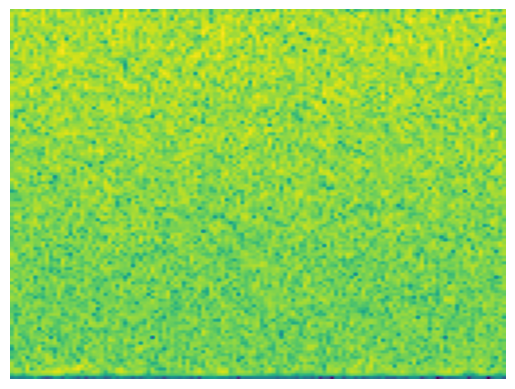

In [ ]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

20 28
wvfrm = 
l =  1100  SNR =  12.4621054905689  m1 =  20  m2 =  28
19 22
wvfrm = 
l =  1101  SNR =  15.14784451951511  m1 =  19  m2 =  22
20 29
wvfrm = 
l =  1102  SNR =  14.191956764913309  m1 =  20  m2 =  29
20 29
wvfrm = 
l =  1103  SNR =  11.934871774611937  m1 =  20  m2 =  29
17 30
wvfrm = 
l =  1104  SNR =  13.198886527766508  m1 =  17  m2 =  30
11 18
wvfrm = 
l =  1105  SNR =  9.267115885882589  m1 =  11  m2 =  18
15 28
wvfrm = 
l =  1106  SNR =  10.4464618770537  m1 =  15  m2 =  28
14 25
wvfrm = 
l =  1107  SNR =  9.69044696943318  m1 =  14  m2 =  25
22 26
wvfrm = 
l =  1108  SNR =  9.706777446385422  m1 =  22  m2 =  26
25 13
wvfrm = 
l =  1109  SNR =  12.339411797297743  m1 =  25  m2 =  13
30 22
wvfrm = 
l =  1110  SNR =  13.73575492973024  m1 =  30  m2 =  22
11 20
wvfrm = 
l =  1111  SNR =  9.342983856047299  m1 =  11  m2 =  20
21 29
wvfrm = 
l =  1112  SNR =  10.090847083616753  m1 =  21  m2 =  29
10 10
wvfrm = 
l =  1113  SNR =  4.814462515397859  m1 =  10  m2 =  10
13 2

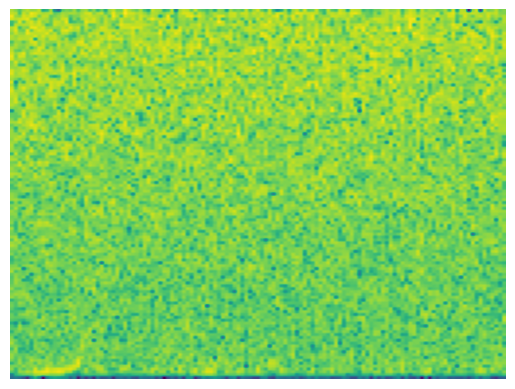

In [ ]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 30
wvfrm = 
l =  1200  SNR =  7.904002226236634  m1 =  10  m2 =  30
27 30
wvfrm = 
l =  1201  SNR =  14.691486171907988  m1 =  27  m2 =  30
14 19
wvfrm = 
l =  1202  SNR =  11.131251681936323  m1 =  14  m2 =  19
17 23
wvfrm = 
l =  1203  SNR =  8.430002586083654  m1 =  17  m2 =  23
14 25
wvfrm = 
l =  1204  SNR =  9.903646241642958  m1 =  14  m2 =  25
11 27
wvfrm = 
l =  1205  SNR =  5.73847432918616  m1 =  11  m2 =  27
30 17
wvfrm = 
l =  1206  SNR =  9.51722209132738  m1 =  30  m2 =  17
24 22
wvfrm = 
l =  1207  SNR =  10.257173024311586  m1 =  24  m2 =  22
13 10
wvfrm = 
l =  1208  SNR =  8.495671550147604  m1 =  13  m2 =  10
13 23
wvfrm = 
l =  1209  SNR =  9.40955700026773  m1 =  13  m2 =  23
17 15
wvfrm = 
l =  1210  SNR =  11.239690206243326  m1 =  17  m2 =  15
16 29
wvfrm = 
l =  1211  SNR =  13.132656920666324  m1 =  16  m2 =  29
16 19
wvfrm = 
l =  1212  SNR =  10.541889311612522  m1 =  16  m2 =  19
14 16
wvfrm = 
l =  1213  SNR =  11.878805000879876  m1 =  14  m2 =  16
22

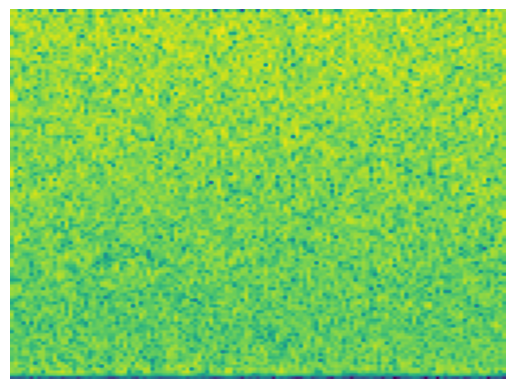

In [ ]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

16 25
wvfrm = 
l =  1300  SNR =  10.005391794579003  m1 =  16  m2 =  25
18 24
wvfrm = 
l =  1301  SNR =  9.151105766066944  m1 =  18  m2 =  24
15 27
wvfrm = 
l =  1302  SNR =  11.552086120005644  m1 =  15  m2 =  27
12 21
wvfrm = 
l =  1303  SNR =  6.50173721068428  m1 =  12  m2 =  21
26 18
wvfrm = 
l =  1304  SNR =  7.876835463607531  m1 =  26  m2 =  18
18 17
wvfrm = 
l =  1305  SNR =  8.938495703572915  m1 =  18  m2 =  17
15 27
wvfrm = 
l =  1306  SNR =  10.58227407926507  m1 =  15  m2 =  27
28 28
wvfrm = 
l =  1307  SNR =  14.562713973717415  m1 =  28  m2 =  28
29 24
wvfrm = 
l =  1308  SNR =  18.32318629707946  m1 =  29  m2 =  24
16 17
wvfrm = 
l =  1309  SNR =  10.108927692141524  m1 =  16  m2 =  17
21 13
wvfrm = 
l =  1310  SNR =  7.965243696509764  m1 =  21  m2 =  13
21 30
wvfrm = 
l =  1311  SNR =  13.587865625326085  m1 =  21  m2 =  30
28 28
wvfrm = 
l =  1312  SNR =  13.493423673807452  m1 =  28  m2 =  28
15 15
wvfrm = 
l =  1313  SNR =  11.69940148631491  m1 =  15  m2 =  15
1

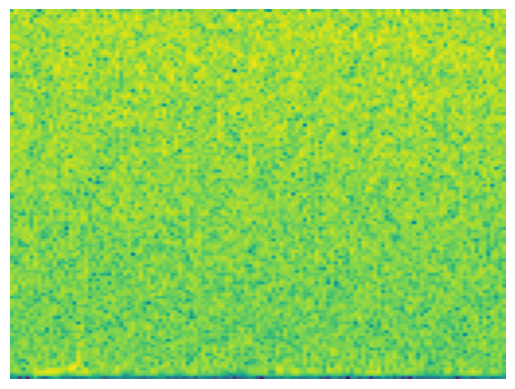

In [ ]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

19 13
wvfrm = 
l =  1400  SNR =  9.894282700141298  m1 =  19  m2 =  13
17 11
wvfrm = 
l =  1401  SNR =  8.042491157306147  m1 =  17  m2 =  11
12 14
wvfrm = 
l =  1402  SNR =  8.389917601182537  m1 =  12  m2 =  14
27 17
wvfrm = 
l =  1403  SNR =  10.584426563246113  m1 =  27  m2 =  17
13 19
wvfrm = 
l =  1404  SNR =  10.913760484792016  m1 =  13  m2 =  19
26 17
wvfrm = 
l =  1405  SNR =  12.616879375566626  m1 =  26  m2 =  17
14 11
wvfrm = 
l =  1406  SNR =  8.049674041805442  m1 =  14  m2 =  11
25 14
wvfrm = 
l =  1407  SNR =  11.006271319104528  m1 =  25  m2 =  14
30 13
wvfrm = 
l =  1408  SNR =  9.272893752464558  m1 =  30  m2 =  13
20 24
wvfrm = 
l =  1409  SNR =  10.005723339723648  m1 =  20  m2 =  24
27 19
wvfrm = 
l =  1410  SNR =  10.92571182676084  m1 =  27  m2 =  19
13 25
wvfrm = 
l =  1411  SNR =  10.084807720518258  m1 =  13  m2 =  25
27 25
wvfrm = 
l =  1412  SNR =  11.50358642356527  m1 =  27  m2 =  25
25 29
wvfrm = 
l =  1413  SNR =  16.600473111409215  m1 =  25  m2 =  29

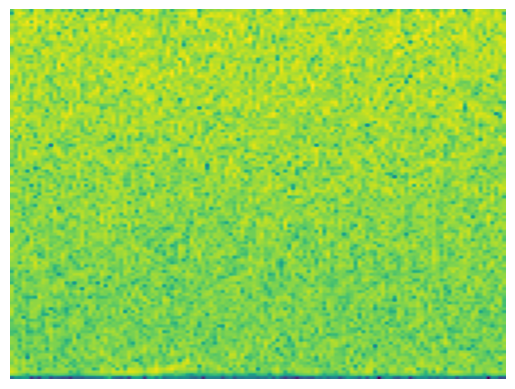

In [ ]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=l + 6000)

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
